In [1]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

sys.path.append('../src/features')
import build_features as bf

In [2]:
orignalDF = pd.read_csv("../data/raw/application_train.csv")

In [3]:
cleanTrain=bf.executeFeatures(orignalDF)

NameError: name 'np' is not defined

In [50]:
cleanTrain.columns

Index(['TARGET', 'DAYS_BIRTH', 'EDU_Academic degree', 'EDU_Higher education',
       'EDU_Incomplete higher', 'EDU_Lower secondary',
       'EDU_Secondary / secondary special', 'FAM_Civil marriage',
       'FAM_Married', 'FAM_Separated', 'FAM_Single / not married',
       'FAM_Unknown', 'FAM_Widow', 'INC_Businessman',
       'INC_Commercial associate', 'INC_Maternity leave', 'INC_Pensioner',
       'INC_State servant', 'INC_Student', 'INC_Unemployed', 'INC_Working'],
      dtype='object')

## Naive Bayes model build

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cleanTrain.iloc[:,1:], 
                                                    cleanTrain.TARGET, test_size = 0.2, random_state = 0)

In [13]:
model = GaussianNB().fit(X_train, y_train)

In [15]:
model.score(X_test, y_test)

0.13253012048192772

## CV 

In [39]:
from sklearn.cross_validation import KFold
from sklearn.metrics import make_scorer, accuracy_score

In [40]:
def run_kfold(clf, X_all, y_all):
    kf = KFold(307511, n_folds = 10)
    outcomes = []
    fold = 0
    for train_i, test_i in kf:
        fold += 1
        X_train, X_test = X_all.values[train_i], X_all.values[test_i]
        y_train, y_test = y_all.values[train_i], y_all.values[test_i]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

In [41]:
run_kfold(model, cleanTrain.iloc[:,1:], cleanTrain.TARGET)

Fold 1 accuracy: 0.13260926118626432
Fold 2 accuracy: 0.13625573152092615
Fold 3 accuracy: 0.13319892036031347
Fold 4 accuracy: 0.13593053884426523
Fold 5 accuracy: 0.1348248837436181
Fold 6 accuracy: 0.13183311111833762
Fold 7 accuracy: 0.13742642515690548
Fold 8 accuracy: 0.11632142044161166
Fold 9 accuracy: 0.13261357354232384
Fold 10 accuracy: 0.12467887223179734
Mean Accuracy: 0.13156927381463634


### Determine ROC

In [17]:
from sklearn.metrics import roc_curve, auc

In [18]:
n_samples, n_features = cleanTrain.iloc[:,1:].shape

In [19]:
predictions = model.predict(X_test)

In [42]:
print(predictions)

[1 1 1 ... 1 1 1]


In [20]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

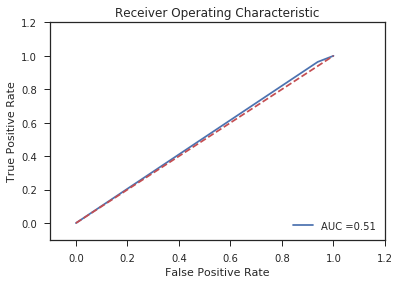

In [37]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC ={:3.2f}'.format(roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()